# Relax Inc. Take-Home Challenge

## Overview

The data has two tables:

* A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years.
* A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven-day  period ,  **identify  which  factors  predict  future  user adoption.**

A user table includes:
* name:  the  user's  name
* object_id:   the  user's  id
* email:  email  address
* creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
  * PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
  * GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
  * ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
  * SIGNUP:  signed  up  via  the  website
  * SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
* creation_time:  when  they  created  their  account
* last_session_creation_time:   unix  timestamp  of  last  login
* opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
* enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip
* org_id:   the  organization  (group  of  users)  they  belong  to 
* invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

### Loading a  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Loading a  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product.

In [3]:
user_engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
print(f'The users dataset dimensions are : {users.shape}')
print(f'The usage summary dataset dimensions are : {user_engage.shape}')

The users dataset dimensions are : (12000, 10)
The usage summary dataset dimensions are : (207917, 3)


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


## Data Wrangling

In [7]:
# Rename object id in users dataset
users.rename(columns = {'object_id':'user_id'}, inplace = True)

#### Check if all the user_ids is present in user_engage

In [8]:
print(f'Is user_id unique : {users["user_id"].is_unique}')
print(f'Is user name unique : {users["name"].is_unique}')
print(f'Is user email unique : {users["email"].is_unique}')

Is user_id unique : True
Is user name unique : False
Is user email unique : False


In [9]:
len(users.user_id.unique()), len(user_engage.user_id.unique())

(12000, 8823)

There are 12000 unique user_ids and only about 8823 user_ids are logged to use the product. So 3177 users have not used the product and so we cannot test whether they adopted the product or not. 

#### Convert to datatimes

In [10]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format="%Y-%m-%d %H:%M:%S")
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
user_engage['time_stamp'] = pd.to_datetime(user_engage['time_stamp'], format="%Y-%m-%d")

#### Convert the columns to boolean and categorical

In [11]:
users['opted_in_to_mailing_list'] = users['opted_in_to_mailing_list'].astype('bool')
users['enabled_for_marketing_drip'] = users['enabled_for_marketing_drip'].astype('bool')

#Convert to categorical
users['creation_source']= users['creation_source'].astype('category')

## Exploratory Data Analysis

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  category      
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  bool          
 7   enabled_for_marketing_drip  12000 non-null  bool          
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: bool(2), category(1), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 691.7+ KB


### Determine an adopted user

In [13]:
user_engage_df = user_engage.copy()
user_engage_df['week_year'] = user_engage_df['time_stamp'].dt.strftime('%W-%Y') #converting each day into week of year
df1 = user_engage_df.groupby(['user_id', 'week_year']).count().reset_index()    #counting the total of each week 
df2 = df1.groupby(['user_id']).max()                                            #taking the maximum value
df2['adopted_user'] = df2['visited'].apply(lambda x : x >= 3)                   #checking if each value is greater or equal to 3

In [14]:
df2['adopted_user'].value_counts()

False    7379
True     1444
Name: adopted_user, dtype: int64

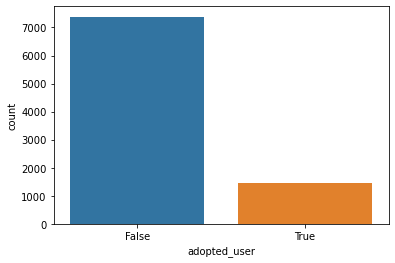

In [15]:
sns.countplot(x='adopted_user', data=df2);

About 1444 users (adopted users) out of a total 8823 have logged into the product on three separate days in at least one seven-day period. The data is unbalanced between adopted users and not adopted users.

### What is the adoption rate?

In [16]:
print(f'Total users who signed up for the product in the last two years : 12,000')
print(f'Total users who has logged into to the product : 8823 or {8823/12000:0.0%}')
print(f'Users who have not logged into the product : {12000 - 8823} or {(12000 - 8823)/12000:0.0%}')
print(f'Users who has logged into the product on three separate days in at least one seven-day period (Adopted) : 1444')
print(f'The adoption rate for these logged users is : {1444/8823:0.0%}')

Total users who signed up for the product in the last two years : 12,000
Total users who has logged into to the product : 8823 or 74%
Users who have not logged into the product : 3177 or 26%
Users who has logged into the product on three separate days in at least one seven-day period (Adopted) : 1444
The adoption rate for these logged users is : 16%


#### Merge the adopted user information to users dataset

In [17]:
df2.head()

,week_year,time_stamp,visited,adopted_user
user_id,,,,
1,16-2014,1,1,False
2,52-2013,3,3,True
3,11-2013,1,1,False
4,20-2013,1,1,False
5,03-2013,1,1,False


In [18]:
merged_users = pd.merge(users, df2[['adopted_user']], how='inner', on='user_id')
merged_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240.0,False


In [19]:
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   category      
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   bool          
 7   enabled_for_marketing_drip  8823 non-null   bool          
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  adopted_user                8823 non-null   bool          
dtypes: bool(3), category(1), datetime64[ns](2), float64(1), 

Attribute 'invited_by_user_id' is missing some values. We will fill it with value '0' as it does not denote any valid user id.

#### Missing values

In [20]:
# Fill missing values with 0
merged_users['invited_by_user_id'].fillna(0, inplace=True)
merged_users['invited_by_user_id'] = merged_users['invited_by_user_id'].astype(int)

### predictive power score matrix

In [21]:
# Import package for predictive power score matrix
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

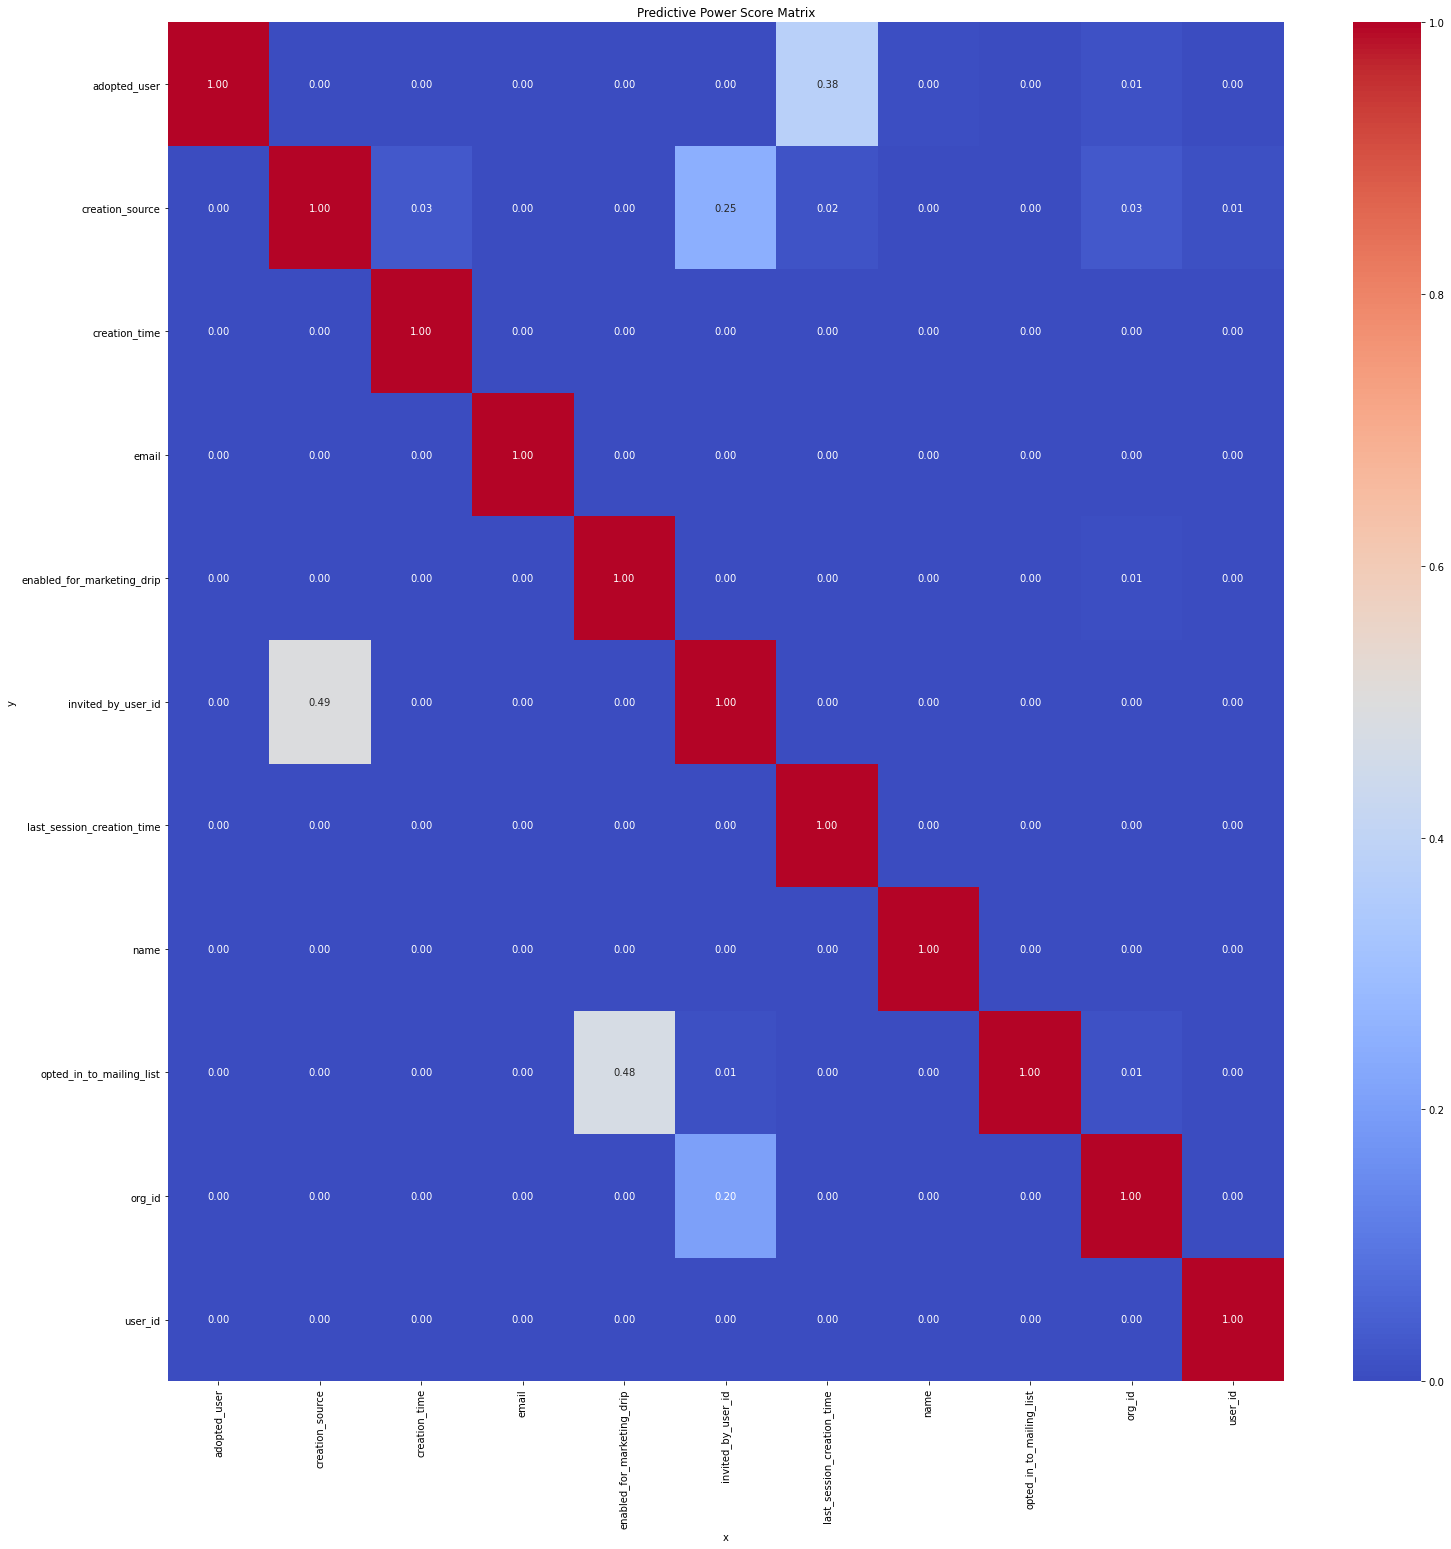

In [22]:
# Plot
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(merged_users).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");

From the Predictive Power Score Matrix, we can deduce the following:
* creation_source can predict 'invited_by_user_id', so can remove invited_by_user_id from our model
* enabled_for_marketing_drip and 'opted_in_to_mailing_list' are related, so we will use enabled_for_marketing_drip in our modeling
* last_session_creation_time can predict adopter user. So we need to use this information in our modeling
* user_id, name can be dropped from our modeling as they are personal information and do not add any value

Final features that will be used further for predictive modeling are:
* label - adopted_user
* columns - creation_source, 'enabled_for_marketing_drip', org_id, last_session_creation_time

### Exploring the data further with adopted user label

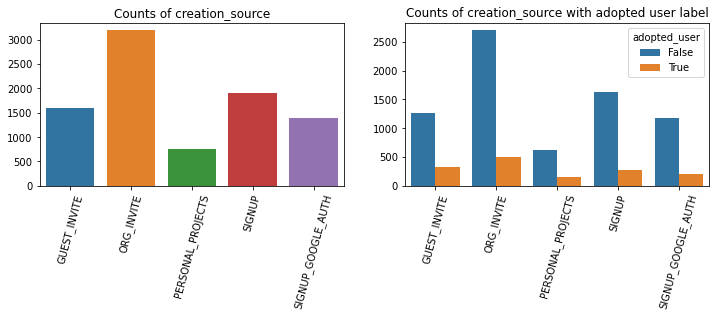

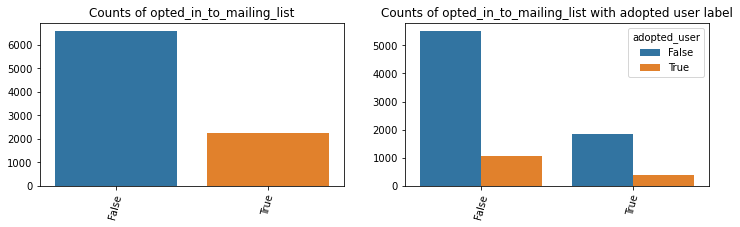

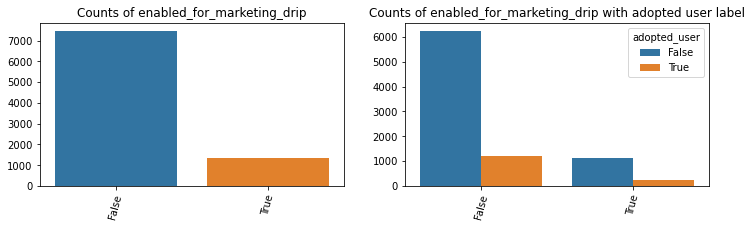

In [23]:
category1 = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
for var in category1:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3)) 
    sns.countplot(x=var, data=merged_users, ax=ax[0])
    ax[0].set_title(f"Counts of {var}")
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 75)
    
    sns.countplot(x=var, data=merged_users, hue = 'adopted_user', ax=ax[1])
    ax[1].set_title(f"Counts of {var} with adopted user label")
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 75)

Majority of the users account was created by invitation to the organization. Personal projects was the least preferred way used to create users account.
Among the adopted users - Invitation to the organization rank the highest followed by Guest Invite.  Personal projects is the least favorite among the adopted users. 

Majority of the users did not opt to receive marketing emails and they are not on the regular marketing email drip

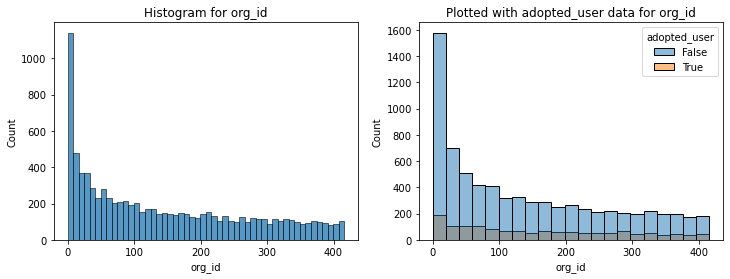

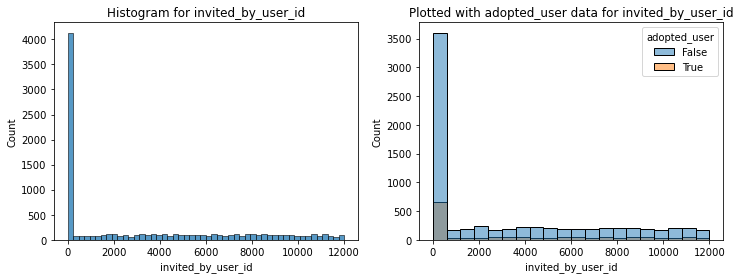

In [24]:
#Create list of numerical column names
numerical = ['org_id','invited_by_user_id']

for var in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(x=var, bins=50, data=merged_users ,ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    sns.histplot(x=var, hue='adopted_user', data=merged_users, ax=ax[1], alpha=0.5)  
    ax[1].set_title(f"Plotted with adopted_user data for {var}")

The organization (group of users) each user belong to is plotted above. Most of the users belong to 0-50 organization id.
invited_by_user_id with value 0 shows that atleast half the users had missing information regarding who invited them.

In [25]:
merged_users['invited_by_user_id'].value_counts()

0        4047
4612       10
11770       9
2308        9
730         8
         ... 
6455        1
3689        1
1255        1
6420        1
5093        1
Name: invited_by_user_id, Length: 2230, dtype: int64

In [26]:
merged_users['org_id'].value_counts()[:20]

0     228
1     172
2     150
3     125
4     122
6     102
9      91
7      88
5      87
10     68
8      67
14     66
17     58
12     57
11     56
18     54
20     50
13     50
33     47
15     47
Name: org_id, dtype: int64

#### Binning Data  - org_id

In [27]:
bins = [-np.inf, 100, 200, 300, merged_users['org_id'].max()]
labels =['upto 100', 'upto 200', 'upto 300', 'upto 400']
merged_users['org_id_binned'] = pd.cut(merged_users['org_id'], bins,labels=labels)

In [28]:
merged_users['org_id_binned'].value_counts()

upto 100    4225
upto 200    1797
upto 300    1424
upto 400    1377
Name: org_id_binned, dtype: int64

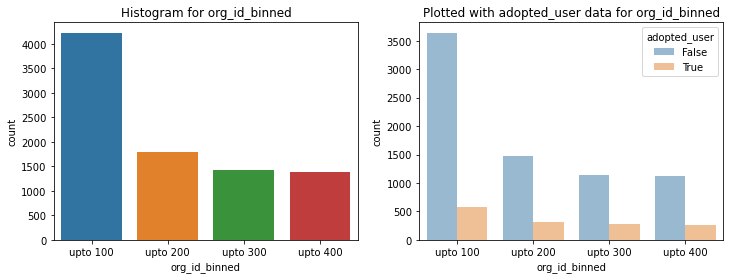

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='org_id_binned', data=merged_users ,ax=ax[0])
ax[0].set_title(f"Histogram for org_id_binned");
    
sns.countplot(x='org_id_binned', hue='adopted_user', data=merged_users, ax=ax[1], alpha=0.5)  
ax[1].set_title(f"Plotted with adopted_user data for org_id_binned");

Most of the users belong to org id that falls within 0-100. The adopted users are distributed almost equally between each group of 100 org ids

#### Email Address

Since the user account is also created using website signups, it may be useful to capture the most common email domains of the users.

In [30]:
def get_email_domain(email):
    email_domain = email.split('@')[1]
    return email_domain
   
merged_users['email_domain'] = merged_users['email'].apply(get_email_domain)

In [31]:
merged_users['email_domain'].value_counts()[:15]

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
hotmail.com        803
luque.com            2
mumdc.com            2
oqpze.com            2
xybhi.com            2
xvnbr.com            2
tgaim.com            1
yhnuj.com            1
upqhn.com            1
mngrr.com            1
Name: email_domain, dtype: int64

In [32]:
# taking only the top email domains counts
top_email_domain = ['gmail.com','yahoo.com', 'jourrapide.com','gustr.com','cuvox.de','hotmail.com']

#new medical_specialty column
merged_users['new_email_domain'] = merged_users['email_domain'].copy()

#replace all email domain not in top with 'Other' category
merged_users.loc[~merged_users.new_email_domain.isin(top_email_domain),'new_email_domain'] = 'Other'

In [33]:
merged_users['new_email_domain'].value_counts()

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
Other              811
hotmail.com        803
Name: new_email_domain, dtype: int64

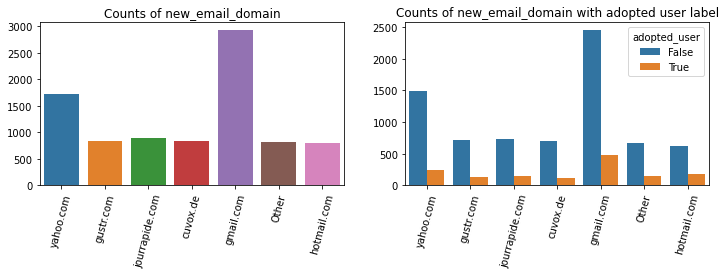

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3)) 
sns.countplot(x='new_email_domain', data=merged_users, ax=ax[0])
ax[0].set_title(f"Counts of new_email_domain")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 75);
    
sns.countplot(x='new_email_domain', data=merged_users, hue = 'adopted_user', ax=ax[1])
ax[1].set_title(f"Counts of new_email_domain with adopted user label")
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 75);

Users having gmail accounts are using it the most for account creation. This account is also used by the adopted users to sign up for their account creation

#### Creation Time

In [35]:
merged_users['month_year'] =merged_users['creation_time'].dt.to_period('M')

In [36]:
merged_users['month_year'].value_counts().sort_index(ascending=False)

2014-05    701
2014-04    542
2014-03    530
2014-02    411
2014-01    441
2013-12    382
2013-11    385
2013-10    396
2013-09    376
2013-08    375
2013-07    318
2013-06    318
2013-05    332
2013-04    325
2013-03    345
2013-02    301
2013-01    315
2012-12    302
2012-11    292
2012-10    305
2012-09    280
2012-08    269
2012-07    282
2012-06    287
2012-05     13
Freq: M, Name: month_year, dtype: int64

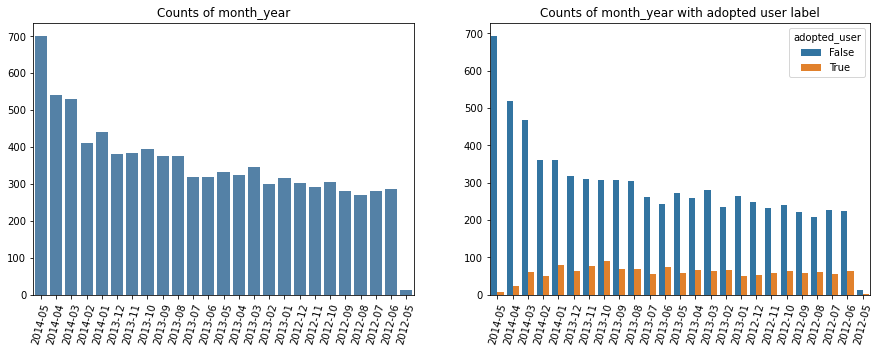

In [37]:
order_by_month = merged_users['month_year'].value_counts().sort_index(ascending=False).index
#order_by_month = merged_users['month_year'].value_counts().index

fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
sns.countplot(x='month_year', data=merged_users, color='steelblue', order = order_by_month, ax=ax[0])
ax[0].set_title(f"Counts of month_year")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 75);
    
sns.countplot(x='month_year', data=merged_users, hue = 'adopted_user', order = order_by_month, ax=ax[1])
ax[1].set_title(f"Counts of month_year with adopted user label")
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 75);

The accounts were created from May 2012 to May 2014 (2 years). The lowest account creation was in May 2012 and the highest was in May 2014. We can see a ready increase in account creation from January 2014

Although the account creation was increasing, user adoption was decreasing by May 2014 (which was the lowest from previous years).This can be because there was less time to capture the data that determines who is an adopted user.

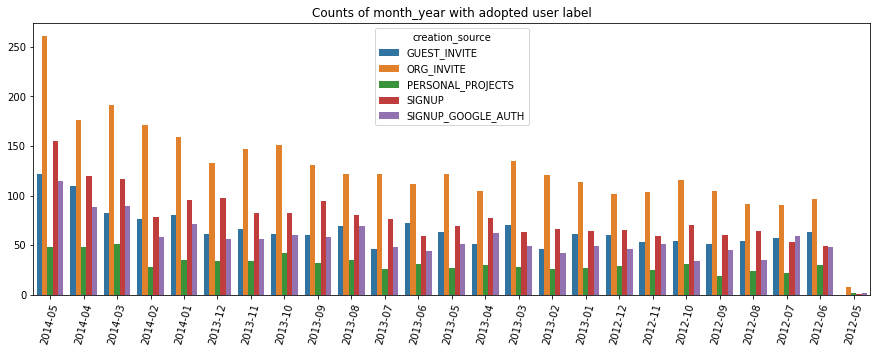

In [38]:
fig, ax = plt.subplots(figsize=(15, 5)) 
sns.countplot(x='month_year', data=merged_users, hue = 'creation_source', order = order_by_month, ax=ax)
ax.set_title(f"Counts of month_year with adopted user label")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75);

From the above graph we can see that Organization Invite to be a full member is the highest among the user account creation. Signups are also another popular way for user creation

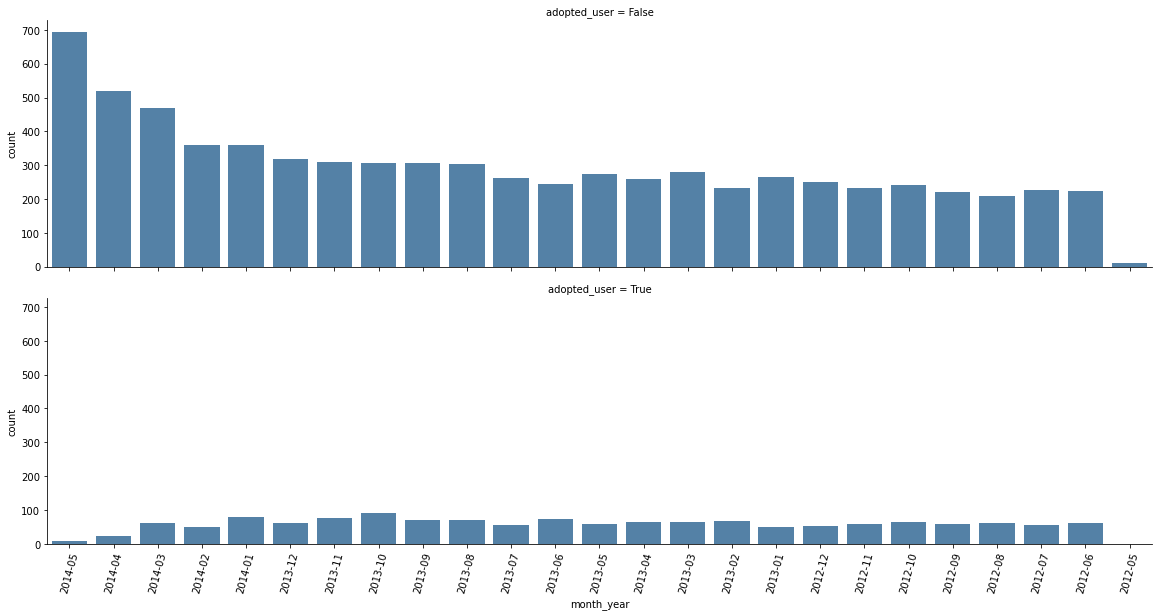

In [39]:
g = sns.catplot(x="month_year", row="adopted_user",height=4, aspect=4,
            kind="count",  color='steelblue', order = order_by_month, data=merged_users)
g.set_xticklabels(rotation = 75);

By separating by month and year and between adopted users/not adopted users, we can see that users adopted the most in October 2013. And from 2014 January to May 2014 the adopted users were decreasing while new account creations were increasing during this time period. 
We can also see that the rate of adoption among the users were steady from June 2012 to March 2014.

#### last_session_creation_time

In [40]:
merged_users['last_session_month_year'] =merged_users['last_session_creation_time'].dt.to_period('M')
merged_users['last_session_month_year'].value_counts().sort_index(ascending=False)

2014-06     708
2014-05    1412
2014-04     476
2014-03     419
2014-02     357
2014-01     360
2013-12     318
2013-11     319
2013-10     329
2013-09     309
2013-08     319
2013-07     279
2013-06     278
2013-05     274
2013-04     290
2013-03     284
2013-02     243
2013-01     266
2012-12     248
2012-11     229
2012-10     251
2012-09     236
2012-08     199
2012-07     218
2012-06     200
2012-05       2
Freq: M, Name: last_session_month_year, dtype: int64

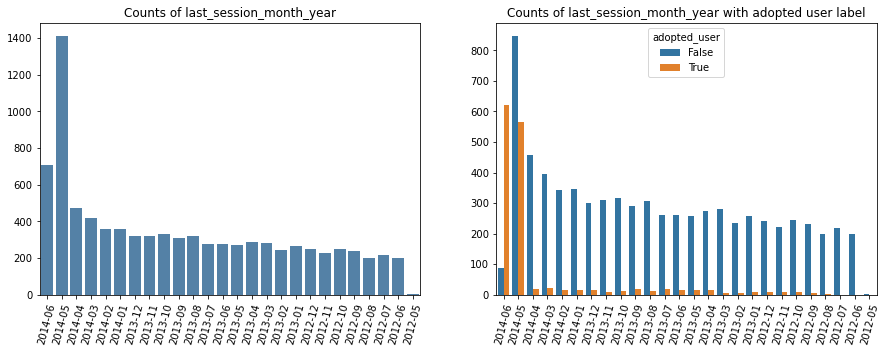

In [41]:
order_months =  merged_users['last_session_month_year'].value_counts().sort_index(ascending=False).index

fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
sns.countplot(x='last_session_month_year', data=merged_users, color='steelblue', order = order_months, ax=ax[0])
ax[0].set_title(f"Counts of last_session_month_year")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 75);
    
sns.countplot(x='last_session_month_year', data=merged_users, hue = 'adopted_user', order = order_months, ax=ax[1])
ax[1].set_title(f"Counts of last_session_month_year with adopted user label")
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 75);

More users have last logged in May 2014 and we can also see that more adopted users have last logged in during May and June 2014. The adopted users' last login sessions are almost at the same level in the previous months

### Difference between creation time and last session time

In [42]:
merged_users['diff_created_lastsession'] = (merged_users['last_session_creation_time'] - merged_users['creation_time']).dt.days
merged_users['diff_created_lastsession'].value_counts()

0      3027
1      1617
2       822
3       405
4       195
       ... 
552       1
424       1
176       1
550       1
425       1
Name: diff_created_lastsession, Length: 512, dtype: int64

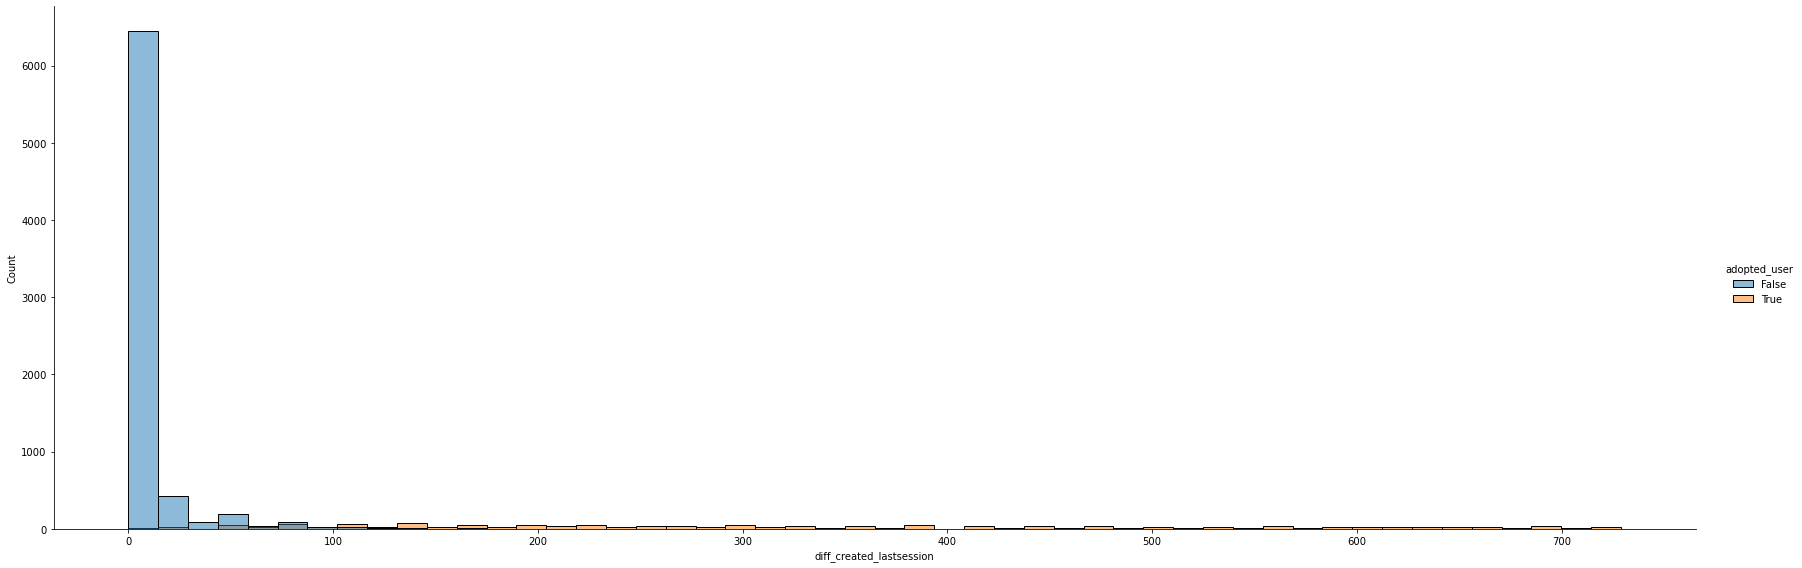

In [43]:
sns.displot(x='diff_created_lastsession', hue='adopted_user', bins = 50, data = merged_users, height = 8, aspect=3);

The difference between user account creation time and last login session for most users is 0 to 1 days. So these users cannot meet the criteria of being an adopted user.

### Binning data - difference between creation time and last session login

In [44]:
bins = [-np.inf, 100, merged_users['diff_created_lastsession'].max()]
labels =['upto 100 days', 'above 100 days']
merged_users['history'] = pd.cut(merged_users['diff_created_lastsession'], bins,labels=labels)

In [45]:
merged_users['history'].value_counts()

upto 100 days     7484
above 100 days    1339
Name: history, dtype: int64

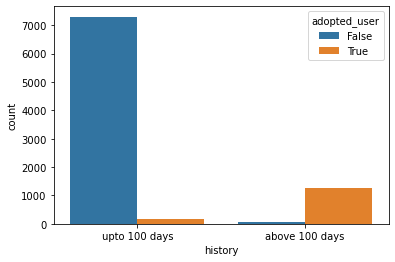

In [46]:
sns.countplot('history', hue='adopted_user', data=merged_users);

#### Relation between 'invited_by_user_id' and 'creation_source'

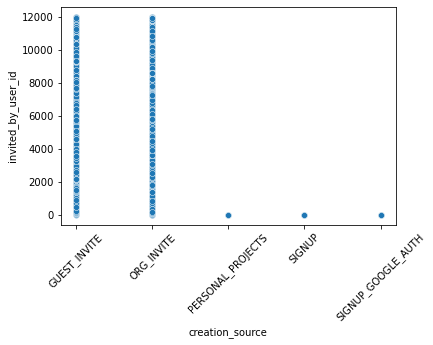

In [47]:
sns.scatterplot(x='creation_source', y='invited_by_user_id', data=merged_users)
plt.xticks(rotation=45);

Invited_by_user_id had a lot of missing values because personal_projects, signup and signup_google_auth did not require any invitation by users. invited_by_user_id is required only for Guest invite and Org_invite.

#### Relation between 'enabled_for_marketing_drip' ,'opted_in_to_mailing_list' and 'adopted_user'

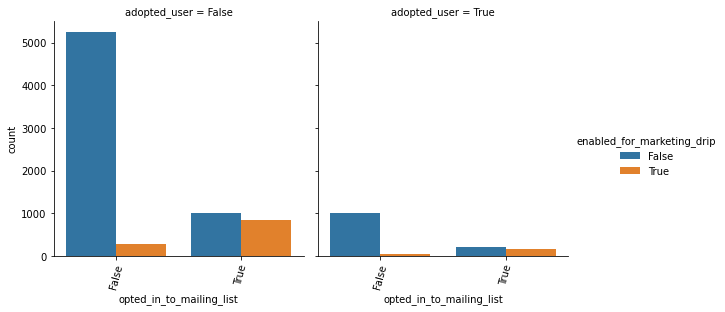

In [48]:
g = sns.catplot(x="opted_in_to_mailing_list",col = 'adopted_user', hue = 'enabled_for_marketing_drip', height=4, aspect=1,
            kind="count", data=merged_users)
g.set_xticklabels(rotation = 75);

Whether an user is an adopted user or not, those who have opted into mailing list are also enabled for marketing drip

## Modeling

In [50]:
dfm = merged_users.copy()
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   category      
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   bool          
 7   enabled_for_marketing_drip  8823 non-null   bool          
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          8823 non-null   int32         
 10  adopted_user                8823 non-null   bool          
 11  org_id_binned               8823 non-null   category    

In [51]:
# with org_id not binned
dfm.drop(['user_id', 'creation_time', 'name', 'email', 'last_session_creation_time',
          'opted_in_to_mailing_list', 'invited_by_user_id', 'org_id_binned', 'email_domain',
          'new_email_domain', 'month_year', 'last_session_month_year', 'diff_created_lastsession'
          ], axis=1, inplace=True)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   creation_source             8823 non-null   category
 1   enabled_for_marketing_drip  8823 non-null   bool    
 2   org_id                      8823 non-null   int64   
 3   adopted_user                8823 non-null   bool    
 4   history                     8823 non-null   category
dtypes: bool(2), category(2), int64(1)
memory usage: 430.7 KB


In [52]:
dfm.head()

,creation_source,enabled_for_marketing_drip,org_id,adopted_user,history
0,GUEST_INVITE,False,11,False,upto 100 days
1,ORG_INVITE,False,1,True,above 100 days
2,ORG_INVITE,False,94,False,upto 100 days
3,GUEST_INVITE,False,1,False,upto 100 days
4,GUEST_INVITE,False,193,False,upto 100 days


In [53]:
#Convert all categorical columns
data = pd.get_dummies(dfm, drop_first=True)
data.head()

,enabled_for_marketing_drip,org_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,history_above 100 days
0,False,11,False,0,0,0,0,0
1,False,1,True,1,0,0,0,1
2,False,94,False,1,0,0,0,0
3,False,1,False,0,0,0,0,0
4,False,193,False,0,0,0,0,0


In [54]:
# Divide into X and y
X = data.drop(columns = {'adopted_user'}, axis = 1).values
y = data['adopted_user'].values

In [55]:
print(f'X: {X.shape} \ny: {y.shape}')

X: (8823, 7) 
y: (8823,)


## 1. Logistic Regression

In [56]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [57]:
# Apply the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify= y)

In [58]:
print(f'Training Class: {X_train.shape} \nTesting Class: { X_test.shape}')

Training Class: (6617, 7) 
Testing Class: (2206, 7)


In [59]:
pipeline_lr = Pipeline([('lr_classifer', LogisticRegression(solver='liblinear', random_state=42))])

In [60]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('lr_classifer',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [61]:
pipeline_lr.score(X_test, y_test)

0.9655485040797824

In [62]:
print(f'Logistic Regression has an accuracy of 96.5%')

Logistic Regression has an accuracy of 96.5%


## Data Modeling using Pycaret

### Getting the data

In [63]:
df = dfm.copy()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   creation_source             8823 non-null   category
 1   enabled_for_marketing_drip  8823 non-null   bool    
 2   org_id                      8823 non-null   int64   
 3   adopted_user                8823 non-null   bool    
 4   history                     8823 non-null   category
dtypes: bool(2), category(2), int64(1)
memory usage: 430.7 KB


### Setting up the Environment in PyCaret

In [65]:
from pycaret.classification import *

In [66]:
exp_clf = setup(data = df, target = 'adopted_user',session_id = 2)

,Description,Value
0,session_id,2
1,Target,adopted_user
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(8823, 5)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing All Models

Comparing all models to evaluate performance. This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [67]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9697,0.9335,0.8755,0.9317,0.9023,0.8844,0.8853,0.4870
nb,Naive Bayes,0.9697,0.9339,0.8755,0.9317,0.9023,0.8844,0.8853,0.0080
ridge,Ridge Classifier,0.9697,0.0000,0.8755,0.9317,0.9023,0.8844,0.8853,0.0070
ada,Ada Boost Classifier,0.9697,0.9328,0.8755,0.9317,0.9023,0.8844,0.8853,0.0290
lda,Linear Discriminant Analysis,0.9697,0.9331,0.8755,0.9317,0.9023,0.8844,0.8853,0.0090
catboost,CatBoost Classifier,0.9692,0.9349,0.8755,0.9289,0.9009,0.8827,0.8836,0.7070
gbc,Gradient Boosting Classifier,0.9689,0.9345,0.8755,0.9270,0.9000,0.8816,0.8824,0.0440
lightgbm,Light Gradient Boosting Machine,0.9689,0.9342,0.8714,0.9305,0.8996,0.8813,0.8822,0.0480
xgboost,Extreme Gradient Boosting,0.9684,0.9344,0.8674,0.9312,0.8977,0.8791,0.8801,0.1540
rf,Random Forest Classifier,0.9563,0.9302,0.8310,0.8898,0.8585,0.8327,0.8340,0.0830


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Out of 15 models, All the highlighed ones have the same accuracy score of 96.9%. Choosing Logistic Regression Classifier for further evaluation.

### Create Models

This function creates a model and scores it using stratified cross validation. 

* Logistic Regression 

#### Logistic Regression Classifier

In [68]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9644,0.9262,0.8384,0.9326,0.8830,0.8621,0.8638
1,0.9693,0.9467,0.8990,0.9082,0.9036,0.8853,0.8853
2,0.9790,0.9531,0.9091,0.9574,0.9326,0.9202,0.9206
3,0.9773,0.9243,0.8687,0.9885,0.9247,0.9115,0.9141
4,0.9790,0.9669,0.9394,0.9300,0.9347,0.9221,0.9222
5,0.9725,0.9207,0.8889,0.9362,0.9119,0.8956,0.8961
6,0.9627,0.9176,0.8673,0.8947,0.8808,0.8587,0.8589
7,0.9579,0.9292,0.8367,0.8913,0.8632,0.8383,0.8389
8,0.9708,0.9251,0.8586,0.9551,0.9043,0.8871,0.8889
9,0.9643,0.9247,0.8485,0.9231,0.8842,0.8632,0.8643


In [69]:
#trained model object is stored in the variable 'lr'. 
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Tune Models

This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation.

#### Logistic Regression Classifier

In [70]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9644,0.9294,0.8384,0.9326,0.8830,0.8621,0.8638
1,0.9693,0.9410,0.8990,0.9082,0.9036,0.8853,0.8853
2,0.9790,0.9556,0.9091,0.9574,0.9326,0.9202,0.9206
3,0.9773,0.9263,0.8687,0.9885,0.9247,0.9115,0.9141
4,0.9790,0.9644,0.9394,0.9300,0.9347,0.9221,0.9222
5,0.9725,0.9229,0.8889,0.9362,0.9119,0.8956,0.8961
6,0.9627,0.9267,0.8673,0.8947,0.8808,0.8587,0.8589
7,0.9579,0.9316,0.8367,0.8913,0.8632,0.8383,0.8389
8,0.9708,0.9196,0.8586,0.9551,0.9043,0.8871,0.8889
9,0.9643,0.9156,0.8485,0.9231,0.8842,0.8632,0.8643


In [71]:
#tuned model object is stored in the variable 'tuned_lr'. 
print(tuned_lr)

LogisticRegression(C=5.93, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Plot Models

####  Logistic Regression Classifier

##### Confusion Matrix

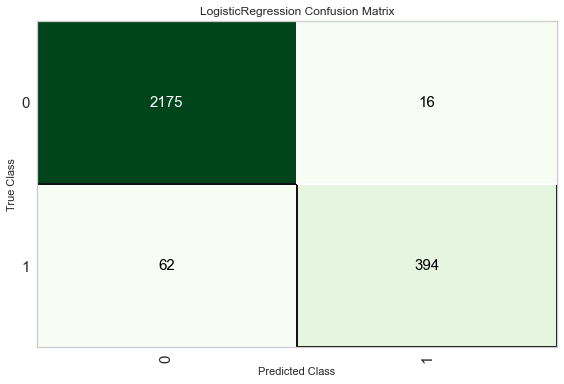

In [72]:
plot_model(lr, plot = 'confusion_matrix')

##### Precision-Recall Curve

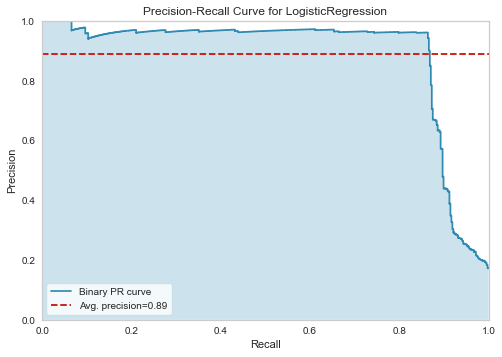

In [73]:
plot_model(lr, plot = 'pr')

##### AUC Plot

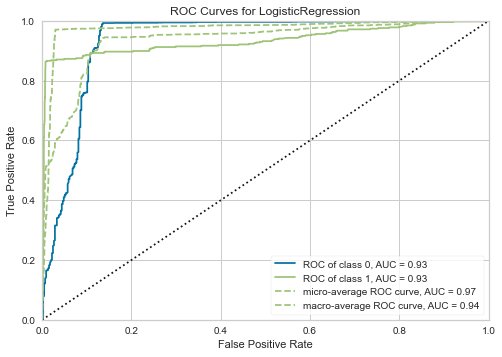

In [74]:
plot_model(lr, plot = 'auc')

##### Feature Importance Plot

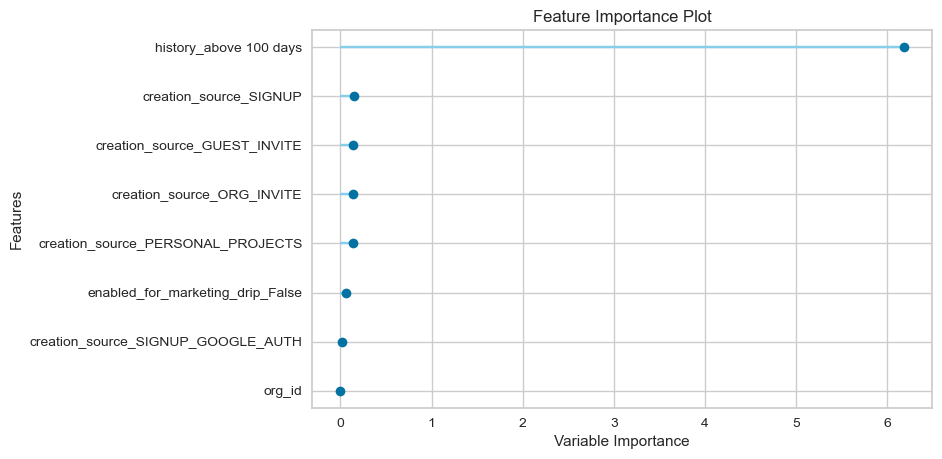

In [75]:
plot_model(lr, plot='feature')

### Predict on test / hold-out Sample

In [76]:
predict_model(lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9705,0.9349,0.8640,0.9610,0.9099,0.8924,0.8942


The accuracy on the test set is 97% compared to 96.9% on the train set. So the model generalized well to set data.

## Summary

From the feature importance we can predict the following factors that predict future user adoption:

* Enough time i.e atleast 100 days should have passed from the user account creation, before an user is deemed as an 'adopted user'.
* User account creation via signups using the website should be encourage more
* User account creation using Guest Invite, org invite and personal projects are all good options and these should be encouraged
* Users being on the regular marketing email drip should be reduced as this is not helping in future user adoption
* User creation via signed up using Google Authentication and belonging to an organization is also helping in user adoption.